In [1]:
# Importing important libraries
import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Setting up max columns displayes to 100
pd.options.display.max_columns = None
pd.set_option('display.width', None)

# Hide warnings
import warnings
warnings.filterwarnings("ignore")

# Set theme
sns.set_style('darkgrid')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# Importing dataset
df = pd.read_csv('../data/kc_house_data_train.csv', index_col=0)

<IPython.core.display.Javascript object>

In [3]:
# Checking the top 5 rows
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.00,4,2.25,2070,8893,2.00,0,0,4,8,2070,0,1986,0,98058,47.44,-122.16,2390,7700
1,7974200820,20140821T000000,865000.00,5,3.00,2900,6730,1.00,0,0,5,8,1830,1070,1977,0,98115,47.68,-122.28,2370,6283
2,7701450110,20140815T000000,1038000.00,4,2.50,3770,10893,2.00,0,2,3,11,3770,0,1997,0,98006,47.56,-122.13,3710,9685
3,9522300010,20150331T000000,1490000.00,3,3.50,4560,14608,2.00,0,2,3,12,4560,0,1990,0,98034,47.70,-122.23,4050,14226
4,9510861140,20140714T000000,711000.00,3,2.50,2550,5376,2.00,0,0,3,9,2550,0,2004,0,98052,47.66,-122.08,2250,4050


In [4]:
df.duplicated('id').sum()

114

In [5]:
# Checking datatimes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  long  

In [6]:
# Double checking for null values
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

- We need to delete the id columns, since it adds no value to the dataset
- Change the feature date to datetime

In [7]:
# Turning date feature into datetime type
df['date'] = pd.to_datetime(df['date'])

<IPython.core.display.Javascript object>

In [8]:
# Deleting features we will not use
df.drop(columns=['id','date'], inplace=True)

In [9]:
# Checking some stats
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00
mean,540739.55,3.37,2.11,2081.46,15243.40,1.49,0.01,0.24,3.41,7.65,1789.31,292.16,1970.79,83.81,98078.19,47.56,-122.21,1987.99,12873.48
std,373318.98,0.94,0.77,920.02,42304.62,0.54,0.09,0.78,0.65,1.17,829.27,443.15,29.34,400.33,53.61,0.14,0.14,684.80,27227.44
min,75000.00,0.00,0.00,290.00,572.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,659.00
25%,321000.00,3.00,1.50,1430.00,5081.25,1.00,0.00,0.00,3.00,7.00,1200.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5111.25
50%,450000.00,3.00,2.25,1920.00,7642.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1974.00,0.00,98065.00,47.57,-122.23,1840.00,7622.50
75%,645000.00,4.00,2.50,2550.00,10725.75,2.00,0.00,0.00,4.00,8.00,2214.50,560.00,1996.00,0.00,98118.00,47.68,-122.13,2360.00,10101.75
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,858132.00


### Findings:
- The train data set contains 17290 rowns and 22 columns
- There aren't any null values
- Fix the date columns to time series
- Is the date column showing when the house was sold?
- Create columns with years since last renovation
- There is a house with 33 bedrooms. Could be an outlier

### Fix any extremes problems with the data

In [10]:
# Using nlargest to see the rows with the highest number of bedrooms
df.nlargest(5,'bedrooms')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8597,640000.00,33,1.75,1620,6000,1.00,0,0,5,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700
2356,520000.00,11,3.00,3000,4960,2.00,0,0,3,7,2400,600,1918,1999,98106,47.56,-122.36,1420,4960
3680,660000.00,10,3.00,2920,3745,2.00,0,0,4,7,1860,1060,1913,0,98105,47.66,-122.32,1810,3745
11181,1148000.00,10,5.25,4590,10920,1.00,0,2,3,9,2500,2090,2008,0,98004,47.59,-122.11,2730,10400
17114,650000.00,10,2.00,3610,11914,2.00,0,0,4,7,3010,600,1958,0,98006,47.57,-122.17,2040,11914


Ok, it is an outlier. Based on the price, it sounds a weird that this house contains 33 bedrooms. Luckily, there is an ID that we can use on internet and see if we can find this house. I was able to find the house with 33 bedrooms on Zillow and Clustmaps. All the information about the house matches, except the number of bedrooms, which seems a typo. The house has 3 bedrooms. Thus, I'll fix it.

In [11]:
# This fixes the house with 33 bedrooms turning it into a 3-bedroom house
df[df['bedrooms'] == 33] = df[df['bedrooms'] == 3]

# This will add 1 bathroom to houses without any bathroom
df['bathrooms'] = df.bedrooms.apply(lambda x: 1 if x < 1 else x)

# Train Test Split

In [12]:
# Removing nan and infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
# Creating train test split
X = df.drop(columns=['price'])
y = df.price

In [14]:
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,test_size=0.25)

# Checking if the training set was correcly splitted
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

<IPython.core.display.Javascript object>

Training set - Features:  (12966, 18) Target:  (12966,)
Test set - Features:  (4323, 18) Target:  (4323,)


In [15]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 91%|█████████ | 39/43 [02:17<00:13,  3.30s/it]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'
XGBRegressor model failed to execute
dlsym(0x7fdc92153200, XGDMatrixSetDenseInfo): symbol not found


100%|██████████| 43/43 [02:18<00:00,  3.23s/it]

                               R-Squared       RMSE  Time Taken
Model                                                          
HistGradientBoostingRegressor       0.89  119317.68        1.61
LGBMRegressor                       0.88  123518.25        1.19
ExtraTreesRegressor                 0.88  126832.92        5.26
RandomForestRegressor               0.87  131095.25       10.96
BaggingRegressor                    0.86  136737.02        1.16
GradientBoostingRegressor           0.85  139307.70        2.81
KNeighborsRegressor                 0.77  173310.54        1.44
PoissonRegressor                    0.74  185921.25        0.07
DecisionTreeRegressor               0.73  186473.11        0.24
ExtraTreeRegressor                  0.71  194876.14        0.09
LassoCV                             0.68  205446.38        0.49
LassoLars                           0.68  205466.83        0.03
BayesianRidge                       0.68  205476.23        0.05
RidgeCV                             0.68

## Checking Score

In [16]:
# Evaluation Function
def rmse(model, y_test, y_pred, X_train, y_train):
    r_squared = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

In [135]:
# Create model line scatter plot
def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
              line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('Price vs Residuals for \n' + model_name), fontsize=16)
    plt.xlabel('Price',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

In [129]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor

In [137]:
# Histogram-based Gradient Boosting Regression Tree
hist = HistGradientBoostingRegressor()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [131]:
rmse(hist, y_test, y_pred, X_train, y_train)

<IPython.core.display.Javascript object>

R-squared: 0.8893724167398707
Mean Squared Error: 120343.6469819296


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

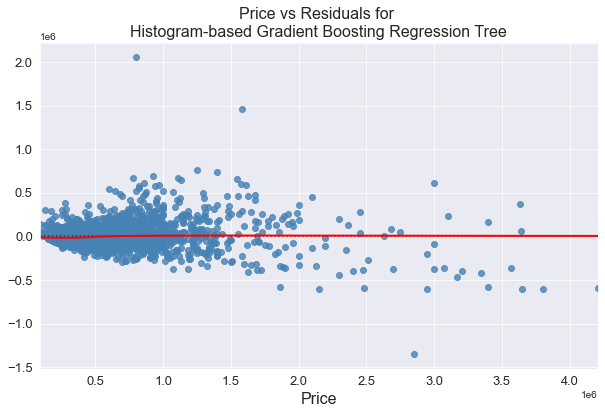

In [142]:
scatter_plot(y_test, y_pred, 'Histogram-based Gradient Boosting Regression Tree')